# Joseph Elikishvili
# IS602 - Final Project

In [697]:
from yahoo_finance import Share
import pandas as pd

#read the file containing 10 stock tickers and quantity.
port = pd.read_csv('c:/data/602portfolio.csv', sep=",")
port

,Ticker,Quantity
0,AAPL,100
1,GOOGL,20
2,BAC,500
3,JPM,100
4,JNJ,90
5,IBM,80
6,KO,200
7,WMT,120
8,LLY,90
9,PFE,250


In [698]:
#Collecting PE and Dividend data for the stocks in the list
stock_data = []

for i in port['Ticker']:
    share = Share(i)
    stock_data.append({'Ticker': i, 'Dividend' : share.get_dividend_yield(), 'PE' : share.get_price_earnings_ratio()})

stock_data = pd.DataFrame(stock_data)
stock_data['Dividend'] = stock_data['Dividend'].astype(float)
stock_data['PE'] = stock_data['PE'].astype(float)

stock_data


,Dividend,PE,Ticker
0,1.95,14.02,AAPL
1,NaN,29.57,GOOGL
2,1.33,16.53,BAC
3,2.21,15.02,JPM
4,2.78,20.35,JNJ
5,3.35,13.58,IBM
6,3.37,25.23,KO
7,2.81,15.08,WMT
8,2.84,32.10,LLY
9,3.95,32.61,PFE


#### Next I will need to calculate value of each position and then determine the relative percentage  of entire portfolio so that we can proceed to calculating the p/e weight of each position so that I can calculate the total p/e and dividend for entire portfolio.

In [699]:
#Populating last prices

lastprices = []

for i in port['Ticker']:
    share = Share(i)
    lastprices.append(share.get_price())

port['LastPrice'] = pd.DataFrame(lastprices)
port 

,Ticker,Quantity,LastPrice
0,AAPL,100,116.52
1,GOOGL,20,807.80
2,BAC,500,22.60
3,JPM,100,87.05
4,JNJ,90,115.96
5,IBM,80,166.71
6,KO,200,41.60
7,WMT,120,69.54
8,LLY,90,73.79
9,PFE,250,32.48


In [700]:
#Calculating TotalValue and weight of each position in portfolio
port['TotalValue'] = port['Quantity'].astype(float)*port['LastPrice'].astype(float)
port['Weight'] = port['TotalValue']/port['TotalValue'].sum()
port

,Ticker,Quantity,LastPrice,TotalValue,Weight
0,AAPL,100,116.52,11652.0,0.113113
1,GOOGL,20,807.80,16156.0,0.156836
2,BAC,500,22.60,11300.0,0.109696
3,JPM,100,87.05,8705.0,0.084505
4,JNJ,90,115.96,10436.4,0.101312
5,IBM,80,166.71,13336.8,0.129468
6,KO,200,41.60,8320.0,0.080767
7,WMT,120,69.54,8344.8,0.081008
8,LLY,90,73.79,6641.1,0.064469
9,PFE,250,32.48,8120.0,0.078826


In [701]:
#Calculating weighted PE and Dividend for each of the positions

port['WeightedPE'] = stock_data['PE']*port['Weight']
port['WeightedDiv'] = stock_data['Dividend']*port['Weight']
port

,Ticker,Quantity,LastPrice,TotalValue,Weight,WeightedPE,WeightedDiv
0,AAPL,100,116.52,11652.0,0.113113,1.585843,0.220570
1,GOOGL,20,807.80,16156.0,0.156836,4.637639,NaN
2,BAC,500,22.60,11300.0,0.109696,1.813272,0.145895
3,JPM,100,87.05,8705.0,0.084505,1.269260,0.186755
4,JNJ,90,115.96,10436.4,0.101312,2.061707,0.281648
5,IBM,80,166.71,13336.8,0.129468,1.758179,0.433719
6,KO,200,41.60,8320.0,0.080767,2.037757,0.272186
7,WMT,120,69.54,8344.8,0.081008,1.221600,0.227632
8,LLY,90,73.79,6641.1,0.064469,2.069459,0.183092
9,PFE,250,32.48,8120.0,0.078826,2.570506,0.311361


In [702]:
#Calculating PE for entire Portfolio
portPE = port['WeightedPE'].sum()
portPE

21.025221677841728

In [703]:
#Calculating Dividend for entire Portfolio
PortDiv = port['WeightedDiv'].sum()
PortDiv

2.2628597417196619

#### Next I will download market data for all tickers in the portfolio

In [704]:
#Download mArket data for all Tickers for 2016 and store in dictionary d as dataframe per Ticker.
d = {}

for i in port['Ticker']:
    share = Share(i)
    prices = share.get_historical('2016-01-01', '2016-12-23')
    d[i] = pd.DataFrame(prices)
     

#### Next I will be calculating position value (shares x last daily price) so that I can build a plot later on and have a daily snapshot of each of the positions.

In [721]:
#Function Calculates returns position value for each stock for entire year 
def dailycalc(ticker):
    perf =[]
    for i in range(1,247):
        perf.append({'Date': d[ticker]['Date'].iloc[i], ticker : float(d[ticker]['Close'].iloc[i])* int(port[port['Ticker']==ticker]['Quantity'])})
    return(perf)
    
#Loop calls the above function for each of the tickers
positions = {}
for i in port['Ticker']:
    temp = dailycalc(i)
    positions[i] = pd.DataFrame(temp)


In [706]:
#Combine daily position values into one dataframe 
full = positions['AAPL']
for i in port['Ticker']:
    full[i] = positions[i][i]
full = full[['Date', 'AAPL', 'GOOGL', 'BAC', 'JPM', 'JNJ', 'IBM', 'KO', 'WMT', 'LLY', 'PFE']]
full.head(3)

,Date,AAPL,GOOGL,BAC,JPM,JNJ,IBM,KO,WMT,LLY,PFE
0,2016-12-22,11629.0001,16193.59986,11270.0005,8688.9999,10389.60018,13364.79984,8309.9998,8350.79952,6593.40018,8085.0000
1,2016-12-21,11705.9998,16244.00024,11314.9995,8675.0000,10377.89982,13386.40016,8314.0000,8548.79976,6592.50000,8100.0005
2,2016-12-20,11694.9997,16304.00024,11354.9995,8652.9999,10409.40036,13408.00048,8332.0000,8618.40000,6604.19973,8212.4995


#### Calculating total daily portfolio value

In [707]:
#Adding up to get total daily portfolio value
temp = full['AAPL'] + full['GOOGL'] + full['BAC'] + full['JPM'] + full['JNJ'] + full['IBM'] + full['KO'] + full['WMT'] + full['LLY'] + full['PFE']
full['Total'] = temp
full.head(3)

c:\python27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Date,AAPL,GOOGL,BAC,JPM,JNJ,IBM,KO,WMT,LLY,PFE,Total
0,2016-12-22,11629.0001,16193.59986,11270.0005,8688.9999,10389.60018,13364.79984,8309.9998,8350.79952,6593.40018,8085.0000,102875.19988
1,2016-12-21,11705.9998,16244.00024,11314.9995,8675.0000,10377.89982,13386.40016,8314.0000,8548.79976,6592.50000,8100.0005,103259.59978
2,2016-12-20,11694.9997,16304.00024,11354.9995,8652.9999,10409.40036,13408.00048,8332.0000,8618.40000,6604.19973,8212.4995,103591.49941


#### Calculating Delta and ln(Delta) to be used later to calculate YTD volatility

In [708]:
#Calculating daily portfolio change and Log
#full['Delta'] = full.Total.pct_change()
#full['Delta'] = full['Delta'].astype(float).fillna(1)
#full['Log'] = np.log(np.power(full['Delta'],2))
full['Delta1'] = full['Total']/full['Total'].shift(1)
full['Delta1'] = full['Delta1'].astype(float).fillna(1)
full['Log1'] = np.log(full['Delta1'])
full.head(3)

c:\python27\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,AAPL,GOOGL,BAC,JPM,JNJ,IBM,KO,WMT,LLY,PFE,Total,Delta1,Log1
0,2016-12-22,11629.0001,16193.59986,11270.0005,8688.9999,10389.60018,13364.79984,8309.9998,8350.79952,6593.40018,8085.0000,102875.19988,1.000000,0.000000
1,2016-12-21,11705.9998,16244.00024,11314.9995,8675.0000,10377.89982,13386.40016,8314.0000,8548.79976,6592.50000,8100.0005,103259.59978,1.003737,0.003730
2,2016-12-20,11694.9997,16304.00024,11354.9995,8652.9999,10409.40036,13408.00048,8332.0000,8618.40000,6604.19973,8212.4995,103591.49941,1.003214,0.003209


In [709]:
### Performing same for SPY to have a benchmark readings against my portfolio 

In [710]:
#getting SPY market data
import numpy as np
spy = Share('SPY')
spyPE = spy.get_price_earnings_ratio()
spyDiv = spy.get_dividend_yield()
spy = spy.get_historical('2016-01-01', '2016-12-23')
spy = pd.DataFrame(spy)
#spy['Delta'] = full.Total.pct_change()
#spy['Delta'] = spy['Delta'].astype(float).fillna(1)
#spy['Log'] = np.log(np.power(spy['Delta'],2))
spy['Close'] = spy['Close'].astype(float).fillna(1)
spy['Delta1'] = spy['Close']/spy['Close'].shift(1)
spy['Delta1'] = spy['Delta1'].astype(float).fillna(1)
spy['Log1'] = np.log(spy['Delta1'])

spy.head(3)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,Delta1,Log1
0,225.710007,225.710007,2016-12-23,225.720001,225.210007,225.429993,SPY,36251400,1.000000,0.000000
1,225.380005,225.380005,2016-12-22,225.740005,224.919998,225.600006,SPY,56219100,0.998538,-0.001463
2,225.770004,225.770004,2016-12-21,226.449997,225.770004,226.25,SPY,67909000,1.001730,0.001729


#### Calculating equavalent number of shares equivalent to portfolio and then simulating an equial  investment into SPY in order to track relative performance.

In [711]:
# We will need to determine amount of SPY shares equivalent to the value of portfolio on 2016-01-04 in order to equally compare the two.

portvalue = full.Total.iloc[-1]
spyprice = spy.Close.iloc[-1]
spyshares =  portvalue/float(spyprice)
spyshares

456.24265727305425

In [712]:
#Next we will need to simulate performance of 456.24 SPY shares year to date.
spy['Performance'] = spy.Close.astype(float) * float(spyshares)
spy.head(3)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume,Delta1,Log1,Performance
0,225.710007,225.710007,2016-12-23,225.720001,225.210007,225.429993,SPY,36251400,1.000000,0.000000,102978.533367
1,225.380005,225.380005,2016-12-22,225.740005,224.919998,225.600006,SPY,56219100,0.998538,-0.001463,102827.972377
2,225.770004,225.770004,2016-12-21,226.449997,225.770004,226.25,SPY,67909000,1.001730,0.001729,103005.906558


In [713]:
#reversing order
#full = full.iloc[::-1]
#full.reindex
#full.head(3)

In [714]:
#test = df.sort('one', ascending=False)
#spy.sort_values(['Date'], ascending=[False])
#spy.head(3)

#### Ploting Portfolio vs SPY in one chart

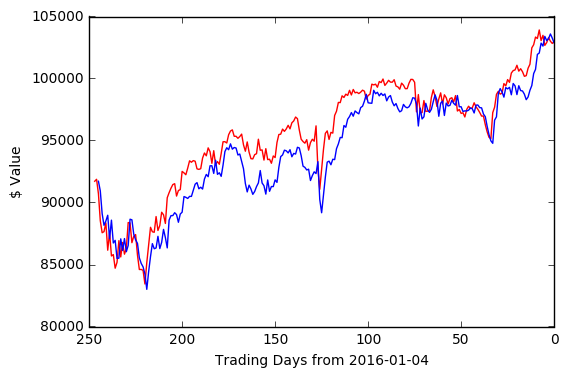

In [715]:
import matplotlib.pyplot as plt
plt.plot(spy.Performance, 'r')
plt.plot(full.Total, 'b')
plt.ylabel('$ Value')
plt.xlabel('Trading Days from 2016-01-04')
plt.gca().invert_xaxis()
plt.show()

In [716]:
#SPY YTD Performance
spyperf = float(spy.Performance[0])/float(spy.Performance[247])
spyperf = round((spyperf-1)*100,2)
spyperf

12.28

In [717]:
#Portfolio YTD Performance
portperf = float(full.Total.iloc[0])/float(full.Total.iloc[-1])
portperf = round((portperf-1)*100,2)
portperf

12.17

In [718]:
#Calculating SPY Realized YTD volatility
import math
spyvol = spy.Log1.std()*math.sqrt(len(spy))
spyvol

0.1303384181281427

In [719]:
import math
portvol = full.Log1.std()*math.sqrt(len(full))
portvol

0.1239100528658134

In [720]:
print "Portfolio Performance"
print"-----------------------"
print "Portfolio YTD: %.2f" %(portperf)
print "Portfolio PE: %.2f" %(portPE)
print "Portfolio Div: %.2f" %(PortDiv)
print "Portfolio YTD Volatility: %.2f" %(portvol*100)
print"-----------------------"
print "S&P 500 Performance"
print"-----------------------"
print "S&P 500 YTD: %.2f" %(spyperf)
print "S&P 500 PE: 26.04"
print "S&P 500 Div: 1.99"
print "S&P 500 YTD Volatility: %.2f" %(spyvol*100)
print"-----------------------"
print "Note: PE ratio and Dividend yeild for S&P 500 have been retrieved and entered manually since yahoo API does not send anything for those values since we are using SPY and it is an ETF"

Portfolio Performance
-----------------------
Portfolio YTD: 12.17
Portfolio PE: 21.03
Portfolio Div: 2.26
Portfolio YTD Volatility: 12.39
-----------------------
S&P 500 Performance
-----------------------
S&P 500 YTD: 12.28
S&P 500 PE: 26.04
S&P 500 Div: 1.99
S&P 500 YTD Volatility: 13.03
-----------------------
Note: PE ratio and Dividend yeild for S&P 500 have been retrieved and entered manually since yahoo API does not send anything for those values since we are using SPY and it is an ETF


In [786]:
# Calculating 10 day vol for spy
import numpy
spyvol10 = []
for i in range(1,238):
    list = [spy.Log1.iloc[i], spy.Log1.iloc[i+1], spy.Log1.iloc[i+2], spy.Log1.iloc[i+3], spy.Log1.iloc[i+4], spy.Log1.iloc[i+5], spy.Log1.iloc[i+6], spy.Log1.iloc[i+7], spy.Log1.iloc[i+8], spy.Log1.iloc[i+9]]
    ten_std = numpy.std(list)
    spyvol10.append(ten_std*math.sqrt(10))


In [791]:
# Calculating 10 day vol for port
portvol10 = []
for i in range(1,236):
    list = [full.Log1.iloc[i], full.Log1.iloc[i+1], full.Log1.iloc[i+2], full.Log1.iloc[i+3], full.Log1.iloc[i+4], full.Log1.iloc[i+5], full.Log1.iloc[i+6], full.Log1.iloc[i+7], full.Log1.iloc[i+8], full.Log1.iloc[i+9]]
    ten_std = numpy.std(list)
    portvol10.append(ten_std*math.sqrt(10))

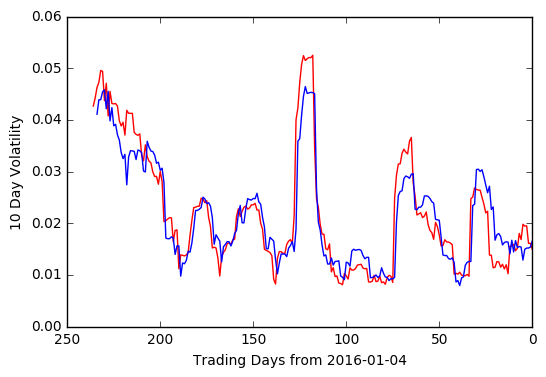

In [794]:
import matplotlib.pyplot as plt
plt.plot(spyvol10, 'r')
plt.plot(portvol10, 'b')
plt.ylabel('10 Day Volatility')
plt.xlabel('Trading Days from 2016-01-04')
plt.gca().invert_xaxis()
plt.show()

#### Summary:  It has been a fun project and I feel that I have learned a lot from it. I had to change couple of minor things as I realized some of the limitations of my plan only after I got started with it. I found a number of disapointing limitations in yahoo API, but since it is a free source I it is good enough. 
#### In the future would like to see if I can improve some sections of this code.  Also I would like to try to connect to Interactive Brokers API and to to get options market data so that I could compare relaized volatility vs implied volatility, it would also  be interesting to play with intraday and/or realtime market data. 
#### I have started another interesting finance project in R for my 607 class (http://rpubs.com/jelikish/236767). I think I will try to implement it in python during the winter break.